In [11]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

# 전체 입력은 4차원, 출력은 3클래스: 정수(0, 1, 2)로 되어있음
iris = load_iris()
x = iris.data 
y = iris.target
N,D = x.shape

# 입력은 3개만 사용: (bias, x[0], x[1])
# 출력은 binary로:  0인지 아닌지
x = np.hstack([np.ones((N,1)), x[:,0:2]])
N,D = x.shape

# class +1 : sample은 black, decision region은 gray
# class -1 : sample은 red, decision region은 white
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = -1

def drawPerceptron(w, x, t_pred, t):
    res = 512 
    
    x1_new = np.linspace(np.min(x[:,1]),np.max(x[:,1]),res)
    x2_new = np.linspace(np.min(x[:,2]),np.max(x[:,2]),res)
    xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)
    
    y_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
    
    id_misclass = np.where(t_pred*t < 0)

    cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
    cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])
    
    plt.figure()
    plt.pcolormesh(xx1_new, xx2_new, y_new > 0, cmap = cmap_region, vmin = 0.0, vmax = 1.0)
    plt.scatter(x[:,1], x[:,2], c = t, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
    plt.scatter(x[id_misclass,1], x[id_misclass,2], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

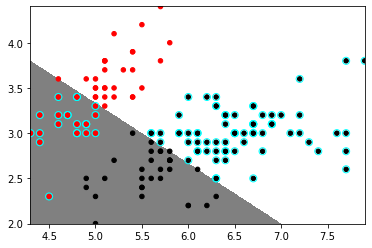

In [12]:
w = np.array([-10, 1.0, 1.5])
y_pred = x.dot(w)
t_pred = np.sign(y_pred)
drawPerceptron(w, x, t_pred, t)

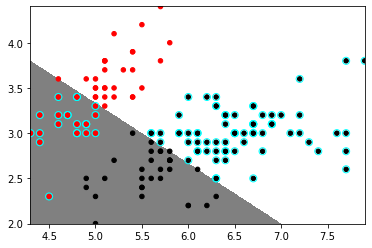

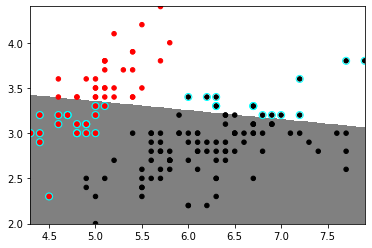

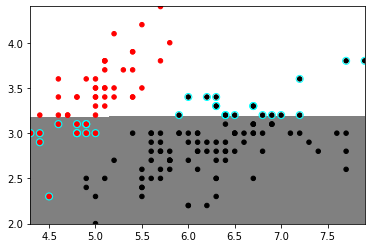

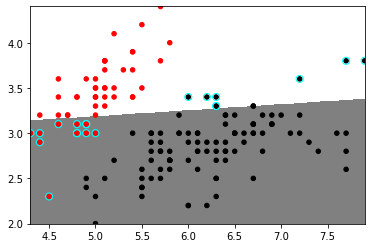

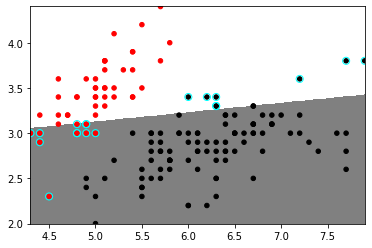

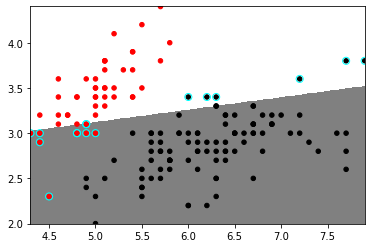

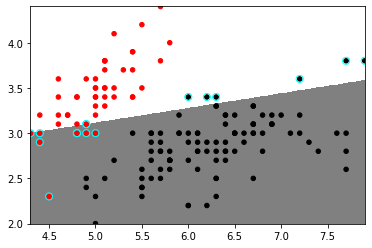

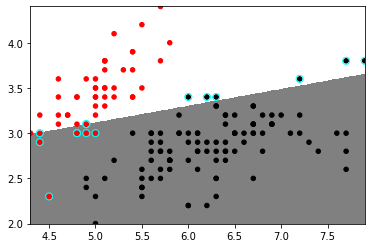

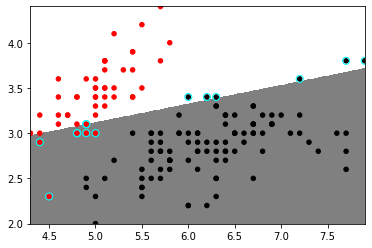

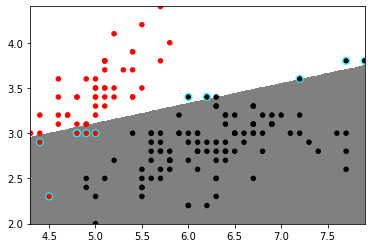

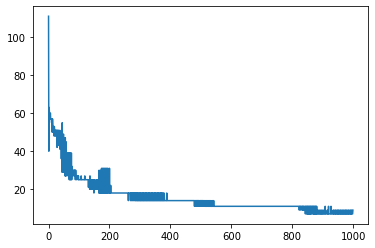

In [13]:
# perceptron, stochastic gradient descent

# hyperparameter
eta = 5e-4
maxEpoch = 1000

cost = []

# initialize
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):
    # prediction
    y_pred = x.dot(w)
    t_pred = np.sign(y_pred)

    # visualize
    if epoch % 100 == 0:
        drawPerceptron(w, x, t_pred, t)
    
    # misclassified patterns
    id_misclass = np.where(t_pred*t < 0)[0]  # 튜플 형태로 돼 있어서 0번째 받아온것
    #id_misclass = np.random.permutation(id_misclass)
    
    if id_misclass.size == 0:
        break
    
    # cost
    cost.append(-np.sum(y[id_misclass]*t[id_misclass]))
    
    # gradient descent
    for n in id_misclass:
        grad = t[n]*x[n,:]
        w = w + eta*grad
    
plt.figure()
plt.plot(cost)

In [58]:
# class +1 : sample은 black, decision region은 gray
# class 0: sample은 red, decision region은 white
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = 0

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

def drawLogistic(w, x, y, t):
    res = 512 
    
    x1_new = np.linspace(np.min(x[:,1]),np.max(x[:,1]),res)
    x2_new = np.linspace(np.min(x[:,2]),np.max(x[:,2]),res)
    xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)
    
    a_new = w[0] + w[1]*xx1_new + w[2]*xx2_new    
    y_new = sigmoid(a_new)

    cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
    cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])
    
    plt.figure()
    plt.pcolormesh(xx1_new, xx2_new, y_new > 0.5, cmap = cmap_region, vmin = 0.0, vmax = 1.0)
    plt.scatter(x[:,1], x[:,2], c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

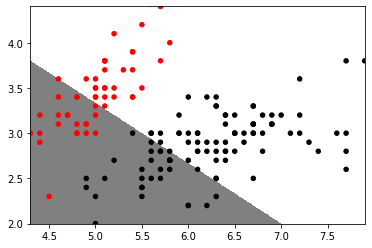

In [59]:
w = np.array([-10, 1.0, 1.5])
a_pred = x.dot(w)
y_pred = sigmoid(a_pred)
drawLogistic(w, x, y_pred, t)

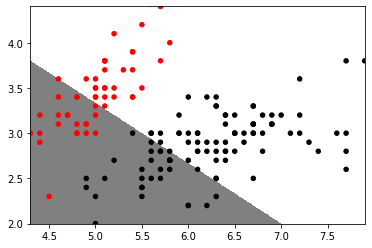

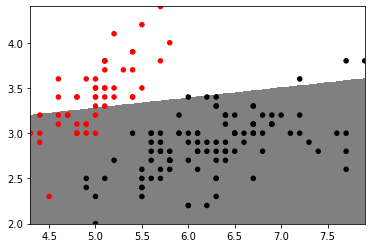

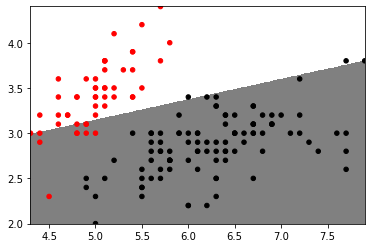

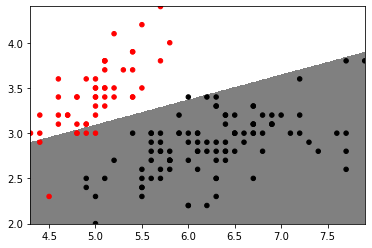

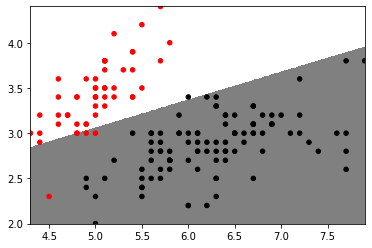

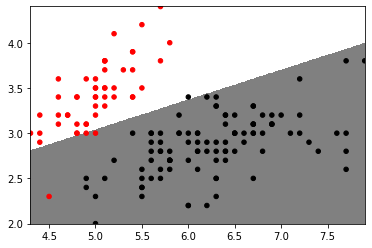

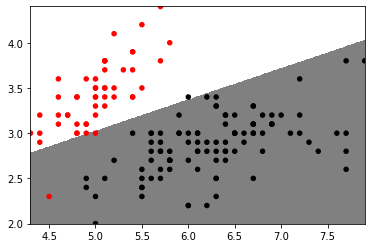

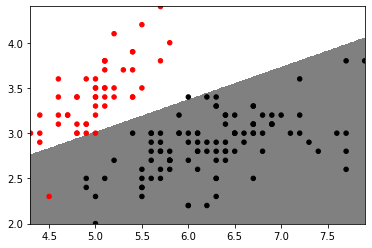

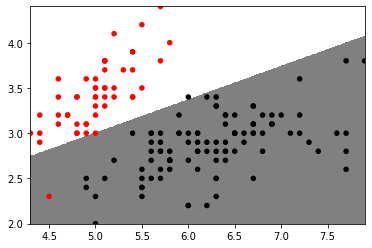

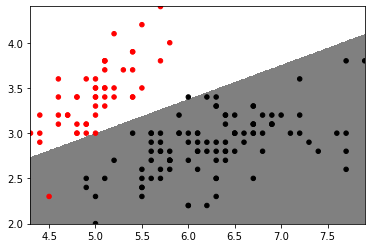

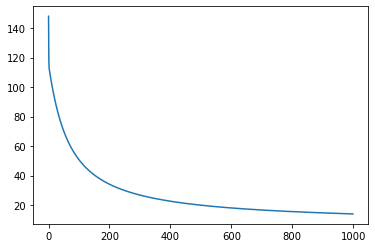

In [84]:
# logistic regression, batch gradient descent

# hyperparameter
eta = 1e-3
maxEpoch = 1000

cost = []

# initialize
w = np.array([-10, 1.0, 1.5])

for epoch in range(maxEpoch):    
    # prediction
    a_pred = x.dot(w)
    y_pred = sigmoid(a_pred)    
    
    # visualize
    if epoch % 100 == 0:
        drawLogistic(w, x, y_pred, t)
    
#     grad = np.zeros(3)
#     for n in range(N):
#         grad += (y_pred[n] - t[n])*x[n,:].reshape(-1)
        
    # gradient descent
    grad = (y_pred - t).reshape(1,-1).dot(x).reshape(-1)
    w = w - eta*grad
    
    # cost
    cost.append( -np.sum(t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred)) )
    
plt.figure()
plt.plot(cost)